# Airbnb indication of occupancy
As an indication to occuapancy rates, we looked at the number of ratings per month for each listing in our data.
We wanted to inlcude the popularity of areas within Melbourne to our decision making as investors.
#### LImitations
We were unable source actual data for occupancy rates. Other data considered was availability but as a host can limit the availability of the listsing we felt that was even more problematic that the number of reviews psoted.


In [158]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dta
#For correlation coefficient if needed
import scipy.stats as st

In [159]:
#Read in csv file

CSV_path = "../clean_data_rs/airbnbFINAL_Swobabika.csv"

airbnbOccStart = pd.read_csv(CSV_path)
airbnbOccStart

,id,host_id,host_name,host_is_superhost,host_total_listings_count,street,neighbourhood_cleansed,city,state,zipcode,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_from_cbd,station_distance
0,12936,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,94,9,10,94,9,9,9,0.15,5.205174,1.4
1,47100,212071,Loren,t,4,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,98,10,10,98,10,10,10,1.75,3.649571,1.1
2,50492,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,97,10,10,97,10,9,10,0.60,5.437003,1.2
3,51592,190879,Michelle,t,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,99,10,9,99,10,10,10,2.07,0.072335,0.5
4,66754,50121,Frank & Vince,t,17,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,95,9,10,95,10,10,9,0.46,2.794548,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,30410904,127327853,Nathan,f,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,100,10,10,100,10,10,10,2.00,0.700146,0.3
8923,30468406,30322920,Robyn,f,1,"Brunswick West, VIC, Australia",Moreland,Brunswick West,Vic,3055,...,0,0,0,0,0,0,0,1.00,5.893982,1.0
8924,30470482,36410227,Sabrina,f,276,"Port Melbourne, Australia",Port Phillip,Port Melbourne,Vic,3207,...,0,0,0,0,0,0,0,1.00,3.780995,3.0
8925,30483362,154023219,Aishah,f,1,"Preston, VIC, Australia",Darebin,Preston,Vic,3072,...,0,0,0,0,0,0,0,1.00,8.746854,0.4


In [160]:
#List of columns
airbnbOccStart.columns

Index(['id', 'host_id', 'host_name', 'host_is_superhost',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'distance_from_cbd', 'station_distance'],
      dtype='object')

In [161]:
# Checking the number of records.
    #number of unique neighbourhoods

print("There are " + str(len(airbnbOccStart)) + " records in the dataframe")
    

print("There are " + str(len(airbnbOccStart["neighbourhood_cleansed"].unique())) +  " unique neighbourhoods in the dataframe")

print("There are " + str(len(airbnbOccStart["city"].unique())) +  " unique suburbs in the dataframe")

There are 8927 records in the dataframe
There are 13 unique neighbourhoods in the dataframe
There are 55 unique suburbs in the dataframe


In [162]:
#determine if blank fields and datatypes
airbnbOccStart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8927 entries, 0 to 8926
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8927 non-null   int64  
 1   host_id                      8927 non-null   int64  
 2   host_name                    8927 non-null   object 
 3   host_is_superhost            8927 non-null   object 
 4   host_total_listings_count    8927 non-null   int64  
 5   street                       8927 non-null   object 
 6   neighbourhood_cleansed       8927 non-null   object 
 7   city                         8927 non-null   object 
 8   state                        8927 non-null   object 
 9   zipcode                      8927 non-null   object 
 10  latitude                     8927 non-null   float64
 11  longitude                    8927 non-null   float64
 12  property_type                8927 non-null   object 
 13  accommodates      

## All Property Types
### Property Type Bar Chart
Determine the range and number of property types in the data

In [163]:
#SUBPLOT BAR CHART

#Data

airbnbpropertycount = airbnbOccStart["property_type"].value_counts()

airbnbpropertysort = airbnbpropertycount.sort_values(ascending=False)

airbnbpropertylist = airbnbpropertysort.index


airbnbpropertycountList = airbnbpropertysort.values

print(airbnbpropertylist)
print(airbnbpropertycountList)

Index(['Apartment', 'House', 'Townhouse', 'Serviced apartment', 'Loft'], dtype='object')
[7227  974  324  280  122]


Text(0, 0.5, 'Property Types')

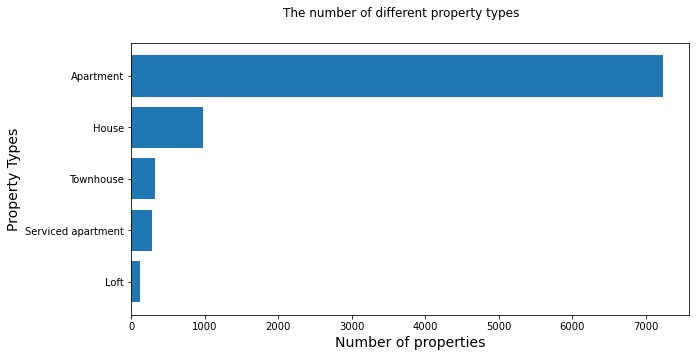

In [164]:
#plot

figProp, (ax) = plt.subplots(1, 1, figsize=(10,5), sharex=True)

figProp.suptitle('The number of different property types')

ax.barh(airbnbpropertylist, airbnbpropertycountList)
    
ax.invert_yaxis()


ax.set_xlabel('Number of properties', fontdict={'fontsize':14})
ax.set_ylabel('Property Types', fontdict={'fontsize':14})


## All Property Types
### Neighbourhood Summary Table
Based on average numbers of reviews per month

In [165]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the number of ratings for each Neighbourhood

# This method produces everything in a single groupby function
airbnbOccNeighGroup = airbnbOccStart.groupby(["neighbourhood_cleansed"])
airbnbOccsummary = airbnbOccNeighGroup["reviews_per_month"].agg(["mean", "median", "var", "std", "sem"])
airbnbOccsummarysort = airbnbOccsummary.sort_values(by="mean", ascending=False) 

airbnb_Occupancy_Rate_Summary = airbnbOccsummarysort.rename(columns={
    "mean":"Mean reviews per month",
    "median":"Median reviews per month",
    "var":"Variance reviews per month",
    "std":"Standard Deviation reviews per month",
    "sem":"SEM reviews per month"
})

airbnb_Occupancy_Rate_Summary

,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
neighbourhood_cleansed,,,,,
Melbourne,2.395453,1.920,4.082722,2.020575,0.030831
Moonee Valley,1.669592,1.310,2.061479,1.435785,0.205112
Banyule,1.540385,1.470,1.805332,1.343626,0.263507
Yarra,1.471980,0.905,2.432001,1.559487,0.047542
Maribyrnong,1.430177,1.130,1.633862,1.278226,0.120245
Boroondara,1.404396,0.825,2.363073,1.537229,0.113947
Port Phillip,1.318080,0.780,2.191741,1.480453,0.036965
Stonnington,1.225599,0.670,2.008366,1.417168,0.048810
Hobsons Bay,1.221892,0.810,1.521660,1.233556,0.202795


#### Neighbourhood Summary Table Observation
* Looking at the Mean and variance, the median is possible the best measure of central tendancy.
* Not suprisingling, Melbourne stands out with the highest median reviews per month.
* With the variances indicating a wide range of "occupancies" throughout each neighbourhood, it was benefical to break the data down and see if there was more consistency at the individual suburbs level

## All Property Types
### Suburb Summary Table Top 10
Based on average number of reviews per month

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the rating for each city

# This method produces everything in a single groupby function
airbnbOccCityGroup = airbnbOccStart.groupby(["city"])
airbnbOccCitysummary = airbnbOccCityGroup["reviews_per_month"].agg(["mean", "median", "var", "std", "sem"])

airbnbOccCitysummary = airbnbOccCitysummary.rename(columns={
    "mean":"Mean reviews per month",
    "median":"Median reviews per month",
    "var":"Variance reviews per month",
    "std":"Standard Deviation reviews per month",
    "sem":"SEM reviews per month"
})

airbnbOccCitysummarysorttop = airbnbOccCitysummary.sort_values(by = "Mean reviews per month", ascending=False)


airbnb_Occupancy_City_Rate_Summary_TopTen = airbnbOccCitysummarysorttop.head(10)

airbnb_Occupancy_City_Rate_Summary_TopTen




,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
city,,,,,
Melbourne,2.560937,2.070,4.220226,2.054319,0.039303
Docklands,2.366012,1.635,5.078946,2.253652,0.121157
West Melbourne,2.257986,2.000,2.911950,1.706444,0.144739
Maribyrnong,2.250417,2.255,2.561909,1.600596,0.326720
Southbank,2.226261,1.815,3.758666,1.938728,0.075579
Carlton,2.010181,1.520,3.392791,1.841953,0.123903
Hawthorn East,1.939722,1.690,4.304186,2.074653,0.345776
Fitzroy,1.896488,1.180,3.459512,1.859976,0.129906
Ascot Vale,1.822381,1.290,2.702499,1.643928,0.358734


## All Property Types
### Suburb Summary Table Bottom 10
Based on average number of reviews per month

In [168]:
airbnbOccCitysummarysortbottom = airbnbOccCitysummary.sort_values(by = "Mean reviews per month", ascending=True)

airbnb_Occupancy_City_Rate_Summary_BottomTen = airbnbOccCitysummarysortbottom.head(10)

airbnb_Occupancy_City_Rate_Summary_BottomTen

,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
city,,,,,
Middle Park,0.634063,0.425,0.324722,0.569844,0.100735
Thornbury,0.643636,0.330,0.565101,0.751732,0.101364
Balaclava,0.664000,0.430,0.562187,0.749792,0.101102
Armadale,0.809200,0.430,0.625824,0.791091,0.158218
St Kilda East,0.818684,0.375,0.846307,0.919950,0.086161
Elwood,0.829012,0.430,0.951986,0.975697,0.074396
Malvern East,0.847826,0.830,0.791563,0.889698,0.185515
Glen Iris,0.860000,0.660,0.509128,0.713532,0.139935
Northcote,0.883359,0.290,1.730232,1.315383,0.116265


In [169]:
#checking which neighbourhoods for the top and bottom 10 cities

# iterating the columns 
for row in airbnb_Occupancy_City_Rate_Summary_TopTen.index: 
     
    neighbourhood = airbnbOccStart[airbnbOccStart.city == row]["neighbourhood_cleansed"]
       
    print("The top suburb of " + row + " is in the neighbourhood of " + neighbourhood.iloc[0])

    
    
print("")
# iterating the columns 
for row in airbnb_Occupancy_City_Rate_Summary_BottomTen.index: 
     
    neighbourhood = airbnbOccStart[airbnbOccStart.city == row]["neighbourhood_cleansed"]
       
    print("The bottom suburb of " + row + " is in the neighbourhood of " + neighbourhood.iloc[0])

The top suburb of Melbourne is in the neighbourhood of Melbourne
The top suburb of Docklands is in the neighbourhood of Melbourne
The top suburb of West Melbourne is in the neighbourhood of Melbourne
The top suburb of Maribyrnong is in the neighbourhood of Maribyrnong
The top suburb of Southbank is in the neighbourhood of Melbourne
The top suburb of Carlton is in the neighbourhood of Melbourne
The top suburb of Hawthorn East is in the neighbourhood of Boroondara
The top suburb of Fitzroy is in the neighbourhood of Yarra
The top suburb of Ascot Vale is in the neighbourhood of Moonee Valley
The top suburb of Brunswick West is in the neighbourhood of Moreland

The bottom suburb of Middle Park is in the neighbourhood of Port Phillip
The bottom suburb of Thornbury is in the neighbourhood of Darebin
The bottom suburb of Balaclava is in the neighbourhood of Port Phillip
The bottom suburb of Armadale is in the neighbourhood of Stonnington
The bottom suburb of St Kilda East is in the neighbourh

#### City Summary Table Observation
* Breaking it down into suburbs has allowed us to better see areas of interest and areas to avoid.
* Of note, some of the bottom ten suburbs are in areas I would have considered popular tourist areas - ie
    * Balaclava
    * St Kilda East
    * Elwood
* This calls into question the viability of using number of reviews as an indication of occupancy rates.

## All Property Types
### Bar plot of total number of reviews
To get a sense of how reviews per month might look for a year, gthe data has be extrapolated to over 12 months

In [170]:
#Top cities data
BarchartseriesTop = airbnb_Occupancy_City_Rate_Summary_TopTen["Mean reviews per month"] * 12

#Create Y axis values
topy = pd.Series(BarchartseriesTop).values
print(topy)

#Create x 
topx = BarchartseriesTop.index
print(topx)



[30.73124451 28.39213873 27.09582734 27.005      26.71513678 24.12217195
 23.27666667 22.75785366 21.86857143 19.98352941]
Index(['Melbourne', 'Docklands', 'West Melbourne', 'Maribyrnong', 'Southbank',
       'Carlton', 'Hawthorn East', 'Fitzroy', 'Ascot Vale', 'Brunswick West'],
      dtype='object', name='city')


In [171]:
#Bottom cities data
BarchartseriesBottom = airbnb_Occupancy_City_Rate_Summary_BottomTen["Mean reviews per month"] * 12
BarchartseriesBottomSort = BarchartseriesBottom.sort_values(ascending=False)
BarchartseriesBottomSort

#Create Y axis values
bottomy = pd.Series(BarchartseriesBottomSort).values
print(bottomy)

#Create x 
bottomx = BarchartseriesBottomSort.index
print(bottomx)

[11.01818182 10.6003125  10.32       10.17391304  9.94813953  9.82421053
  9.7104      7.968       7.72363636  7.60875   ]
Index(['Caulfield South', 'Northcote', 'Glen Iris', 'Malvern East', 'Elwood',
       'St Kilda East', 'Armadale', 'Balaclava', 'Thornbury', 'Middle Park'],
      dtype='object', name='city')


Text(0, 0.5, 'Bottom Cities')

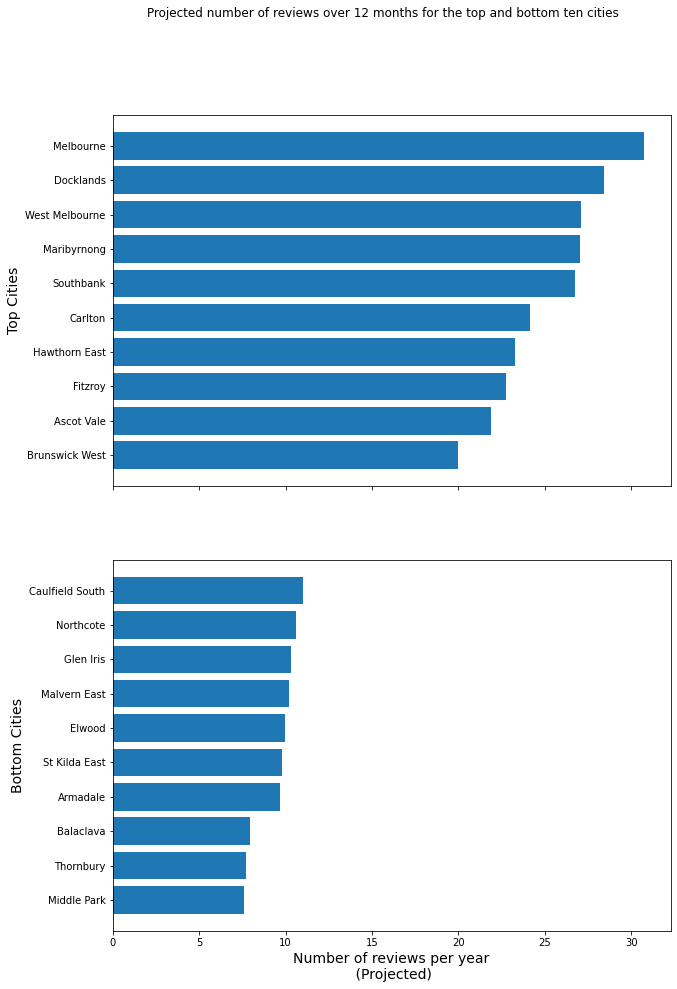

In [172]:
#SUBPLOT BAR CHART
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,15), sharex=True)


fig.suptitle('Projected number of reviews over 12 months for the top and bottom ten cities')


ax1.barh(topx, topy)
ax2.barh(bottomx, bottomy)

for ax in fig.axes:
    ax.invert_yaxis()
#    ax.tick_params(labelrotation=45)
    



ax2.set_xlabel('Number of reviews per year\n (Projected)', fontdict={'fontsize':14})
ax1.set_ylabel('Top Cities', fontdict={'fontsize':14})
ax2.set_ylabel('Bottom Cities',  fontdict={'fontsize':14})
#ax1.invert_yaxis()



## All Property Types
### Occupancy by property type

In [179]:
# This method produces everything in a single groupby function
airbnbOccPropertyGroup = airbnbOccStart.groupby(["property_type"])

airbnbOccPropertyMean = airbnbOccPropertyGroup["reviews_per_month"].agg("mean")
print(airbnbOccPropertyMean)
print("")

#extrapolate to 12 months
airbnbOccPropertyYear = (airbnbOccPropertyMean * 12).sort_values(ascending=False)
print(airbnbOccPropertyYear)
print("")


#Create Y axis values
propy = pd.Series(airbnbOccPropertyYear).values
print(propy)
print("")

#Create x 
propx = airbnbOccPropertyYear.index
print(propx)




#airbnbOccCitysummarysorttop = airbnbOccCitysummary.sort_values(by = "Mean reviews per month", ascending=False)


#airbnb_Occupancy_City_Rate_Summary_TopTen = airbnbOccCitysummarysorttop.head(10)

#airbnb_Occupancy_City_Rate_Summary_TopTen

property_type
Apartment             1.967079
House                 0.981992
Loft                  2.341885
Serviced apartment    1.729000
Townhouse             1.155957
Name: reviews_per_month, dtype: float64

property_type
Loft                  28.102623
Apartment             23.604948
Serviced apartment    20.748000
Townhouse             13.871481
House                 11.783901
Name: reviews_per_month, dtype: float64

[28.10262295 23.60494811 20.748      13.87148148 11.78390144]

Index(['Loft', 'Apartment', 'Serviced apartment', 'Townhouse', 'House'], dtype='object', name='property_type')


Text(0, 0.5, 'Property Types')

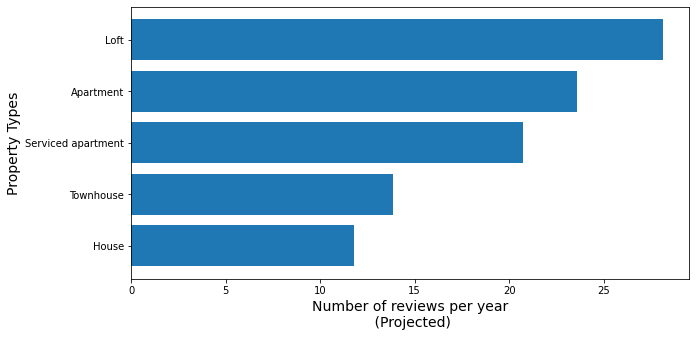

In [181]:
#SUBPLOT BAR CHART
figpropcount, (ax) = plt.subplots(1, 1, figsize=(10,5))


fig.suptitle('Projected number of reviews over 12 months for property types')

ax.barh(propx, propy)
#ax1.barh(propx, propy)


#for ax in fig.axes:
#    ax.tick_params(labelrotation=45)

ax.invert_yaxis()
#ax2.bar(bottomx, bottomy)


ax.set_xlabel('Number of reviews per year\n (Projected)', fontdict={'fontsize':14})
ax.set_ylabel('Property Types', fontdict={'fontsize':14})

#### Occupancy by property type Observation
* Although lofts were the property type with the highest number of reviews it was based on the smallest number of data points.
* The second highest in the chart is apartment. As this is by far the highest amount of property types in the data, and with the highest indication of "occupancy", we decided to only look at Apartments.

## Apartments
### Neighbourhood Summary Table

In [183]:
#Filter out all orther proporty types other than Apartments
airbnbOccStart
airbnbOccApt = airbnbOccStart.loc[airbnbOccStart["property_type"] == "Apartment", :]
airbnbOccApt

,id,host_id,host_name,host_is_superhost,host_total_listings_count,street,neighbourhood_cleansed,city,state,zipcode,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_from_cbd,station_distance
0,12936,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,94,9,10,94,9,9,9,0.15,5.205174,1.4
1,47100,212071,Loren,t,4,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,98,10,10,98,10,10,10,1.75,3.649571,1.1
2,50492,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,97,10,10,97,10,9,10,0.60,5.437003,1.2
4,66754,50121,Frank & Vince,t,17,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,95,9,10,95,10,10,9,0.46,2.794548,0.5
7,69421,347754,Wendy,f,1,"Clifton Hill, VIC, Australia",Yarra,Clifton Hill,Vic,3068,...,100,10,10,100,10,10,10,0.03,4.745384,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,30389737,219978954,Phoebe,f,6,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,100,10,10,100,10,10,10,2.00,0.650711,0.5
8921,30407530,228323812,October,f,1,"Melbourne, Mel, Australia",Melbourne,Melbourne,Vic,3000,...,0,0,0,0,0,0,0,0.00,0.533425,0.4
8922,30410904,127327853,Nathan,f,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,100,10,10,100,10,10,10,2.00,0.700146,0.3
8924,30470482,36410227,Sabrina,f,276,"Port Melbourne, Australia",Port Phillip,Port Melbourne,Vic,3207,...,0,0,0,0,0,0,0,1.00,3.780995,3.0


In [184]:
# Checking the number of records.
    #number of unique neighbourhoods

print("There are " + str(len(airbnbOccApt)) + " records in the dataframe")
    

print("There are " + str(len(airbnbOccApt["neighbourhood_cleansed"].unique())) +  " unique neighbourhoods in the dataframe")

print("There are " + str(len(airbnbOccApt["city"].unique())) +  " unique suburbs in the dataframe")

There are 7227 records in the dataframe
There are 13 unique neighbourhoods in the dataframe
There are 55 unique suburbs in the dataframe


In [185]:
#determine if blank fields and datatypes
airbnbOccApt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7227 entries, 0 to 8925
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           7227 non-null   int64  
 1   host_id                      7227 non-null   int64  
 2   host_name                    7227 non-null   object 
 3   host_is_superhost            7227 non-null   object 
 4   host_total_listings_count    7227 non-null   int64  
 5   street                       7227 non-null   object 
 6   neighbourhood_cleansed       7227 non-null   object 
 7   city                         7227 non-null   object 
 8   state                        7227 non-null   object 
 9   zipcode                      7227 non-null   object 
 10  latitude                     7227 non-null   float64
 11  longitude                    7227 non-null   float64
 12  property_type                7227 non-null   object 
 13  accommodates      

## Apartments
### Confirm
Determine the range and number of property types in the data

In [186]:
#Confirm that all data is an apartment property type.

#Data

airbnbAptcount = airbnbOccApt["property_type"].value_counts()

airbnbAptsort = airbnbAptcount.sort_values(ascending=False)

airbnbAptlist = airbnbAptsort.index


airbnbaptcountList = airbnbAptsort.values

print(airbnbAptlist)
print(airbnbaptcountList)

Index(['Apartment'], dtype='object')
[7227]


## Apartments
### Neighbourhood Summary Table
Based on average numbers of reviews per month

In [188]:
#APARTMENTS
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the number of ratings for each Neighbourhood

# This method produces everything in a single groupby function
airbnbOccAptNeighGroup = airbnbOccApt.groupby(["neighbourhood_cleansed"])
airbnbOccAptsummary = airbnbOccAptNeighGroup["reviews_per_month"].agg(["mean", "median", "var", "std", "sem"])
airbnbOccAptsummarysort = airbnbOccAptsummary.sort_values(by="mean", ascending=False) 

airbnb_Apartment_Occupancy_Rate_Summary = airbnbOccAptsummarysort.rename(columns={
    "mean":"Mean reviews per month",
    "median":"Median reviews per month",
    "var":"Variance reviews per month",
    "std":"Standard Deviation reviews per month",
    "sem":"SEM reviews per month"
})

airbnb_Apartment_Occupancy_Rate_Summary

,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
neighbourhood_cleansed,,,,,
Melbourne,2.444064,2.000,4.086446,2.021496,0.032300
Moonee Valley,1.742593,1.590,1.492858,1.221826,0.235140
Yarra,1.655513,1.020,2.742532,1.656059,0.063414
Hobsons Bay,1.482941,1.000,1.675972,1.294593,0.313985
Maribyrnong,1.448261,1.165,1.788899,1.337497,0.197203
Boroondara,1.422560,0.970,2.283453,1.511110,0.135158
Port Phillip,1.387251,0.840,2.349745,1.532888,0.042779
Moreland,1.362216,0.745,2.377881,1.542038,0.116235
Banyule,1.326875,1.395,1.706210,1.306220,0.326555


#### Neighbourhood Summary Table Observation
* No further major insights into neighbourhood summary

## Apartments
### Suburb Summary Table Top 10
Based on average number of reviews per month

In [189]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the rating for each city

# This method produces everything in a single groupby function
airbnbOccAptCityGroup = airbnbOccApt.groupby(["city"])
airbnbOccAptCitysummary = airbnbOccAptCityGroup["reviews_per_month"].agg(["mean", "median", "var", "std", "sem"])

airbnbOccAptCitysummary = airbnbOccAptCitysummary.rename(columns={
    "mean":"Mean reviews per month",
    "median":"Median reviews per month",
    "var":"Variance reviews per month",
    "std":"Standard Deviation reviews per month",
    "sem":"SEM reviews per month"
})

airbnbOccAptCitysummarysorttop = airbnbOccAptCitysummary.sort_values(by = "Mean reviews per month", ascending=False)


airbnb_Apartment_Occupancy_City_Rate_Summary_TopTen = airbnbOccAptCitysummarysorttop.head(10)

airbnb_Apartment_Occupancy_City_Rate_Summary_TopTen





,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
city,,,,,
Melbourne,2.588145,2.140,4.175681,2.043448,0.040083
West Melbourne,2.418200,2.065,3.200775,1.789071,0.178907
Docklands,2.316334,1.610,5.038998,2.244771,0.127289
Southbank,2.243846,1.940,3.630384,1.905357,0.077082
Fitzroy,2.196567,1.790,3.784611,1.945408,0.168058
Brunswick West,2.078750,1.415,4.610351,2.147173,0.438290
Maribyrnong,2.060714,1.595,2.909853,1.705829,0.455902
Coburg,2.046667,1.960,1.867825,1.366684,0.455561
Carlton,2.045241,1.500,3.835680,1.958489,0.152008


## Apartments
### Suburb Summary Table Bottom 10
Based on average number of reviews per month

In [191]:
airbnbOccAptCitysummarysortbottom = airbnbOccAptCitysummary.sort_values(by = "Mean reviews per month", ascending=True)

airbnb_Apartment_Occupancy_City_Rate_Summary_BottomTen = airbnbOccAptCitysummarysortbottom.head(10)

airbnb_Apartment_Occupancy_City_Rate_Summary_BottomTen

,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
city,,,,,
Balaclava,0.569268,0.37,0.342167,0.584950,0.091354
Middle Park,0.670526,0.43,0.356372,0.596969,0.136954
St Kilda East,0.818090,0.37,0.823672,0.907564,0.096202
Thornbury,0.825484,0.51,0.772306,0.878809,0.157839
Armadale,0.900526,0.56,0.623183,0.789419,0.181105
Elwood,0.918244,0.50,1.065350,1.032158,0.090180
Toorak,0.971818,0.70,0.786076,0.886609,0.133661
Glen Iris,0.973684,0.82,0.574436,0.757915,0.173878
Brunswick East,0.991915,0.55,1.544155,1.242640,0.181258


In [192]:
#checking which neighbourhoods for the top and bottom 10 cities

# iterating the columns 
for row in airbnb_Apartment_Occupancy_City_Rate_Summary_TopTen.index: 
     
    neighbourhood = airbnbOccApt[airbnbOccApt.city == row]["neighbourhood_cleansed"]
       
    print("The top suburb of " + row + " is in the neighbourhood of " + neighbourhood.iloc[0])

    
    
print("")
# iterating the columns 
for row in airbnb_Apartment_Occupancy_City_Rate_Summary_BottomTen.index: 
     
    neighbourhood = airbnbOccApt[airbnbOccApt.city == row]["neighbourhood_cleansed"]
       
    print("The bottom suburb of " + row + " is in the neighbourhood of " + neighbourhood.iloc[0])

The top suburb of Melbourne is in the neighbourhood of Melbourne
The top suburb of West Melbourne is in the neighbourhood of Melbourne
The top suburb of Docklands is in the neighbourhood of Melbourne
The top suburb of Southbank is in the neighbourhood of Melbourne
The top suburb of Fitzroy is in the neighbourhood of Yarra
The top suburb of Brunswick West is in the neighbourhood of Moreland
The top suburb of Maribyrnong is in the neighbourhood of Maribyrnong
The top suburb of Coburg is in the neighbourhood of Moreland
The top suburb of Carlton is in the neighbourhood of Melbourne
The top suburb of Hawthorn East is in the neighbourhood of Boroondara

The bottom suburb of Balaclava is in the neighbourhood of Port Phillip
The bottom suburb of Middle Park is in the neighbourhood of Port Phillip
The bottom suburb of St Kilda East is in the neighbourhood of Glen Eira
The bottom suburb of Thornbury is in the neighbourhood of Darebin
The bottom suburb of Armadale is in the neighbourhood of Ston

#### City Summary Table Observation
* ???

## Apartments
### Bar plot of total number of reviews
To get a sense of how reviews per month might look for a year, gthe data has be extrapolated to over 12 months

In [193]:
#Top cities data
AptBarchartseriesTop = airbnb_Apartment_Occupancy_City_Rate_Summary_TopTen["Mean reviews per month"] * 12

#Create Y axis values
Apttopy = pd.Series(AptBarchartseriesTop).values
print(Apttopy)

#Create x 
Apttopx = AptBarchartseriesTop.index
print(Apttopx)




[31.05774529 29.0184     27.79601286 26.92615385 26.35880597 24.945
 24.72857143 24.56       24.54289157 22.94571429]
Index(['Melbourne', 'West Melbourne', 'Docklands', 'Southbank', 'Fitzroy',
       'Brunswick West', 'Maribyrnong', 'Coburg', 'Carlton', 'Hawthorn East'],
      dtype='object', name='city')


In [194]:
#Bottom cities data
AptBarchartseriesBottom = airbnb_Apartment_Occupancy_City_Rate_Summary_BottomTen["Mean reviews per month"] * 12
AptBarchartseriesBottomSort = AptBarchartseriesBottom.sort_values(ascending=False)
AptBarchartseriesBottomSort

#Create Y axis values
Aptbottomy = pd.Series(AptBarchartseriesBottomSort).values
print(Aptbottomy)

#Create x 
Aptbottomx = AptBarchartseriesBottomSort.index
print(Aptbottomx)

[12.3389011  11.90297872 11.68421053 11.66181818 11.0189313  10.80631579
  9.90580645  9.81707865  8.04631579  6.83121951]
Index(['Port Melbourne', 'Brunswick East', 'Glen Iris', 'Toorak', 'Elwood',
       'Armadale', 'Thornbury', 'St Kilda East', 'Middle Park', 'Balaclava'],
      dtype='object', name='city')


Text(0, 0.5, 'Bottom Cities')

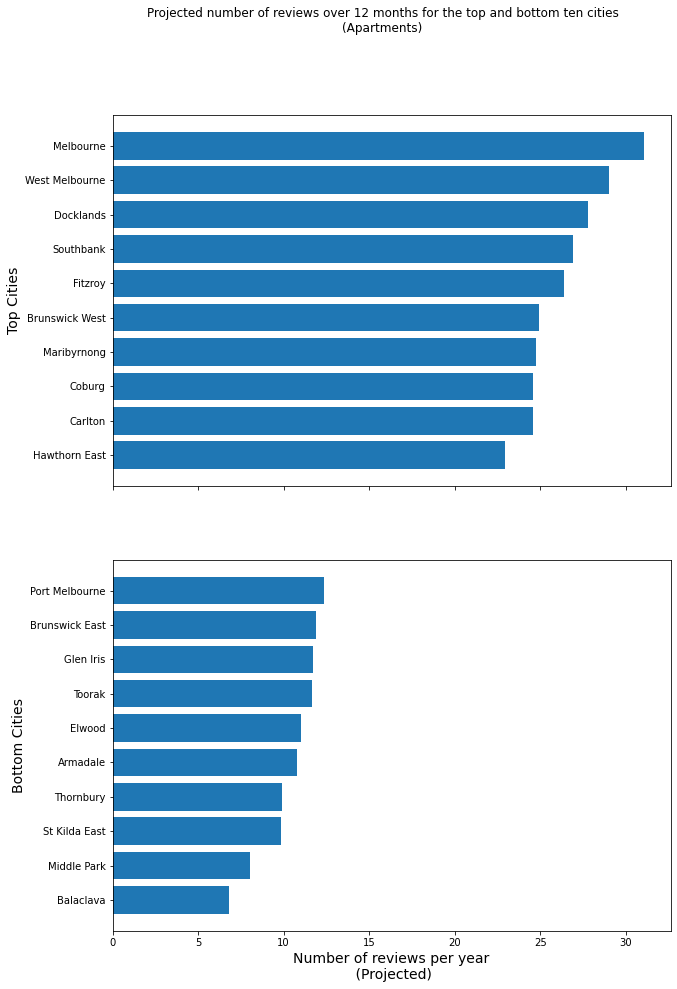

In [197]:
#SUBPLOT BAR CHART
Aptfig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,15), sharex=True)


Aptfig.suptitle('Projected number of reviews over 12 months for the top and bottom ten cities\n(Apartments)')


ax1.barh(Apttopx, Apttopy)
ax2.barh(Aptbottomx, Aptbottomy)

for ax in Aptfig.axes:
    ax.invert_yaxis()
#    ax.tick_params(labelrotation=45)
    



ax2.set_xlabel('Number of reviews per year\n (Projected)', fontdict={'fontsize':14})
ax1.set_ylabel('Top Cities', fontdict={'fontsize':14})
ax2.set_ylabel('Bottom Cities',  fontdict={'fontsize':14})
#ax1.invert_yaxis()